In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [75]:
cars = pd.read_csv("/resources/data/car_price/autos.csv",encoding='latin1')

In [76]:
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [77]:
cars.shape

(371528, 20)

In [78]:
cars.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [79]:
cars_updated = cars.dropna()

In [80]:
cars_updated.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [81]:
cars_updated = cars_updated.iloc[:,[6,7,8,9,10,11,12,13,14,15,4]]

In [82]:
cars_updated.columns

Index(['vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'price'],
      dtype='object')

In [83]:
print('Vehicle Type: ',cars_updated.vehicleType.unique())
print('Gearbox: ',cars_updated.gearbox.unique())
print('Fuel Type: ',cars_updated.fuelType.unique())
print('Repaired Damage: ',cars_updated.notRepairedDamage.unique())

Vehicle Type:  ['kleinwagen' 'limousine' 'cabrio' 'kombi' 'suv' 'bus' 'coupe' 'andere']
Gearbox:  ['manuell' 'automatik']
Fuel Type:  ['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
Repaired Damage:  ['nein' 'ja']


In [195]:
print('Brand: ',cars_updated.brand.unique())

Brand:  ['volkswagen' 'skoda' 'bmw' 'peugeot' 'mazda' 'nissan' 'renault' 'ford'
 'mercedes_benz' 'seat' 'honda' 'fiat' 'mini' 'smart' 'audi' 'subaru'
 'mitsubishi' 'hyundai' 'opel' 'alfa_romeo' 'lancia' 'porsche' 'citroen'
 'toyota' 'kia' 'chevrolet' 'dacia' 'suzuki' 'daihatsu' 'chrysler' 'volvo'
 'jaguar' 'rover' 'jeep' 'saab' 'daewoo' 'land_rover' 'lada' 'trabant']


In [196]:
print('Model: ',cars_updated.model.unique())

Model:  ['golf' 'fabia' '3er' '2_reihe' '3_reihe' 'passat' 'navara' 'twingo'
 'c_max' 'a_klasse' 'scirocco' '5er' 'arosa' 'civic' 'punto' 'e_klasse'
 'andere' 'one' 'clio' '1er' 'b_klasse' 'fortwo' 'a8' 'jetta' 'fiesta'
 'c_klasse' 'micra' 'vito' 'sprinter' 'escort' 'forester' 'scenic' 'a1'
 'focus' 'tt' 'astra' 'a6' 'jazz' 'transporter' 'polo' 'slk' '7er' 'combo'
 '80' '147' 'z_reihe' 'ibiza' 'mustang' 'eos' 'a4' 'touran' 'getz'
 'insignia' 'megane' 'a3' 'lupo' 'colt' 'corsa' 'vectra' 'berlingo'
 'm_klasse' 'tiguan' '6_reihe' 'c4' 'panda' 'up' 'i_reihe' 'ceed' 'kangoo'
 '5_reihe' 'yeti' 'octavia' 'zafira' 'mii' 'rx_reihe' 'mondeo' 'fox'
 'matiz' 'beetle' 'rio' 'touareg' 'logan' 'omega' 'cuore' 's_max' 'modus'
 'a2' 'a5' 'galaxy' 'c3' 'viano' 's_klasse' 'sharan' 'avensis' 'roomster'
 'q5' 'santa' 'leon' 'cooper' 'sportage' 'caddy' 'glk' 'clk' 'primera'
 '4_reihe' 'espace' 'exeo' 'sl' 'juke' 'x_reihe' '1_reihe' 'v40' 'accord'
 'corolla' 'grand' 'phaeton' 'verso' 'swift' 'rav' 'kuga' 'qa

In [84]:
cars_updated.replace({'gearbox':{'manuell':'manual','automatik':'automatic'}},inplace=True)
cars_updated.replace({'vehicleType':{'kleinwagen':'small_car','kombi':'combi','andere':'Others'}},inplace=True)
cars_updated.replace({'fuelType':{'benzin':'petrol','andere':'others','elektro':'electro'}},inplace=True)
cars_updated.replace({'notRepairedDamage':{'nein':'no','ja':'yes'}},inplace=True)

In [85]:
cars_updated.head(10)

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
3,small_car,2001,manual,75,golf,150000,6,petrol,volkswagen,no,1500
4,small_car,2008,manual,69,fabia,90000,7,diesel,skoda,no,3600
5,limousine,1995,manual,102,3er,150000,10,petrol,bmw,yes,650
6,cabrio,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2200
7,limousine,1980,manual,50,andere,40000,7,petrol,volkswagen,no,0
10,limousine,2004,manual,105,3_reihe,150000,12,petrol,mazda,no,2000
11,combi,2005,manual,140,passat,150000,12,diesel,volkswagen,yes,2799
14,suv,2011,manual,190,navara,70000,3,diesel,nissan,no,17999
17,small_car,2004,automatic,75,twingo,150000,2,petrol,renault,no,1750
18,bus,2007,manual,136,c_max,150000,6,diesel,ford,no,7550


In [89]:
cars_updated = cars_updated.loc[(cars_updated.price>400)&(cars_updated.price<=40000)]
cars_updated = cars_updated.loc[(cars_updated.yearOfRegistration>1990)&(cars_updated.yearOfRegistration<=2016)]
cars_updated = cars_updated.loc[(cars_updated.powerPS>10)]
cars_updated = cars_updated.loc[(cars_updated.kilometer>1000)&(cars_updated.kilometer<=150000)]

In [87]:
import time
from datetime import date

In [90]:
#Replacing all the 0 month values to 1
cars_updated.monthOfRegistration.replace(0,1,inplace=True)
# Making the year and month column to get a single date
Purchase_Datetime=pd.to_datetime(cars_updated.yearOfRegistration*10000+cars_updated.monthOfRegistration*100+1,format='%Y%m%d')
y=pd.to_datetime('201851', format='%Y%m%d')
# Calculating days old by subracting both date fields and converting them into integer
Days_old=(y-Purchase_Datetime)
Days_old=(Days_old / np.timedelta64(1, 'D')).astype(int)
#type(Days_old[1])
cars_updated['Days_old']=Days_old

In [91]:
cars_updated.drop(columns=['yearOfRegistration','monthOfRegistration','powerPS'],inplace=True)

In [92]:
cars_updated.head()

,vehicleType,gearbox,model,kilometer,fuelType,brand,notRepairedDamage,price,Days_old
3,small_car,manual,golf,150000,petrol,volkswagen,no,1500,6178
4,small_car,manual,fabia,90000,diesel,skoda,no,3600,3591
5,limousine,manual,3er,150000,petrol,bmw,yes,650,8248
6,cabrio,manual,2_reihe,150000,petrol,peugeot,no,2200,5021
10,limousine,manual,3_reihe,150000,petrol,mazda,no,2000,4899


In [159]:
cars_dummies=pd.get_dummies(data=cars_updated,columns=['notRepairedDamage','gearbox'])

In [94]:
cars_dummies.head(10)

,vehicleType,model,kilometer,fuelType,brand,price,Days_old,notRepairedDamage_no,notRepairedDamage_yes,gearbox_automatic,gearbox_manual
3,small_car,golf,150000,petrol,volkswagen,1500,6178,1,0,0,1
4,small_car,fabia,90000,diesel,skoda,3600,3591,1,0,0,1
5,limousine,3er,150000,petrol,bmw,650,8248,0,1,0,1
6,cabrio,2_reihe,150000,petrol,peugeot,2200,5021,1,0,0,1
10,limousine,3_reihe,150000,petrol,mazda,2000,4899,1,0,0,1
11,combi,passat,150000,diesel,volkswagen,2799,4534,0,1,0,1
14,suv,navara,70000,diesel,nissan,17999,2618,1,0,0,1
17,small_car,twingo,150000,petrol,renault,1750,5203,1,0,1,0
18,bus,c_max,150000,diesel,ford,7550,3987,1,0,0,1
19,bus,a_klasse,150000,petrol,mercedes_benz,1850,5234,1,0,0,1


In [64]:
#Target encoding
#If target encoding is performed before training and validation data split, it may simply overfit with the validation data and the results may not be reliable. 
#Therefore, encoding should be performed after training and validation data split.
#mean_encoding=cars_dummies.groupby(['brand']).agg({'price':['mean']}).reset_index()
#cars_dummies = cars_dummies.merge(mean_encoding,on='brand',how='left')

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [65]:
cars_dummies.head()

,vehicleType,model,kilometer,fuelType,brand,price,Days_old,notRepairedDamage_no,notRepairedDamage_yes,gearbox_automatic,gearbox_manual,"(price, mean)"
0,small_car,golf,150000,petrol,volkswagen,1500,6178,1,0,0,1,6411.905437
1,small_car,fabia,90000,diesel,skoda,3600,3591,1,0,0,1,7169.166514
2,limousine,3er,150000,petrol,bmw,650,8248,0,1,0,1,9056.280416
3,cabrio,2_reihe,150000,petrol,peugeot,2200,5021,1,0,0,1,3847.301225
4,limousine,3_reihe,150000,petrol,mazda,2000,4899,1,0,0,1,4922.721094


In [178]:
X = cars_dummies.drop('price',axis=1)

In [179]:
y = cars_dummies.price

In [180]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['vehicleType'] = le.fit_transform(X['vehicleType'])
X['model'] = le.fit_transform(X['model'])
X['fuelType'] = le.fit_transform(X['fuelType'])
X['brand'] = le.fit_transform(X['brand'])

In [102]:
X.head(5)

,vehicleType,model,kilometer,fuelType,brand,Days_old,notRepairedDamage_no,notRepairedDamage_yes,gearbox_automatic,gearbox_manual
3,6,116,150000,6,37,6178,1,0,0,1
4,6,101,90000,1,31,3591,1,0,0,1
5,5,10,150000,6,2,8248,0,1,0,1
6,2,7,150000,6,25,5021,1,0,0,1
10,5,9,150000,6,19,4899,1,0,0,1


In [112]:
X.shape

(233372, 10)

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=123)
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [104]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

2345.92609191273

In [105]:
#Predicting the test set results
y_pred = rf.predict(X_test)
print(rf.score(X_test, y_test)*100,'% Prediction Accuracy')

87.88092755418322 % Prediction Accuracy


In [106]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_S = scaler.fit_transform(X)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_S, y,test_size=0.20, random_state=123)
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [108]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

2346.745036069007

In [109]:
y_pred = rf.predict(X_test)
print(rf.score(X_test, y_test)*100,'% Prediction Accuracy')

87.87246473352128 % Prediction Accuracy


In [111]:
!pip install xgboost

Scaling Doesn't effect

In [129]:
#XGBOOST Regressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

/home/jupyterlab/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [130]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2505.697981


In [131]:
y_pred = xg_reg.predict(X_test)
print(xg_reg.score(X_test, y_test)*100,'% Prediction Accuracy')

86.17394830029934 % Prediction Accuracy


In [134]:
#Grid Search 
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X, y)

grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
grid_accuracy

In [ ]:
base_accuracy = 87.87246473352128
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

In [141]:
numerical_features = list(X.columns.values)
target = 'price'
spearman = cars_dummies[numerical_features + [target]].corr("spearman")
pearson = cars_dummies[numerical_features + [target]].corr("pearson")
p = pearson[target].rename("Pearson")
s = spearman[target].rename("Spearman")
from pandas import DataFrame
corr = DataFrame(data = p)
corr = corr.assign(Spearman = s)

In [142]:
from IPython.display import display
display(corr.round(2).sort_values("Pearson", ascending=False))

,Pearson,Spearman
price,1.00,1.00
gearbox_automatic,0.33,0.30
notRepairedDamage_no,0.17,0.24
model,0.01,-0.03
vehicleType,-0.08,-0.15
brand,-0.14,-0.13
notRepairedDamage_yes,-0.17,-0.24
fuelType,-0.27,-0.32
gearbox_manual,-0.33,-0.30
kilometer,-0.48,-0.45


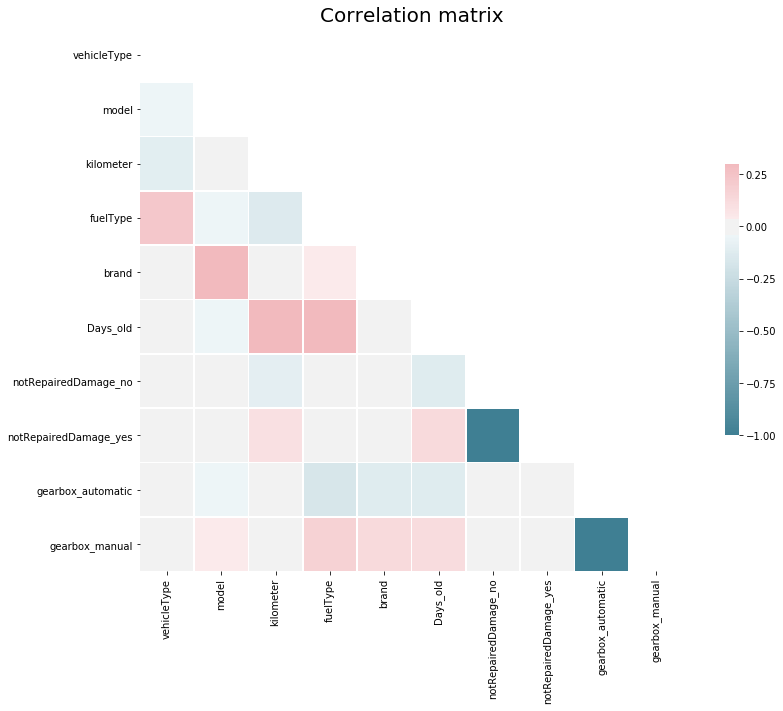

In [144]:
# Generate a custom diverging colormap
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Compute the correlation matrix
corr = X.corr()
#print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix', 
          fontsize = 20)
plt.show()

In [181]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
gbr = GradientBoostingRegressor(loss ='ls', max_depth=11)
gbr.fit(X_train,y_train)
preds = gbr.predict(X_test)

In [182]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2234.097664


In [183]:
y_pred = gbr.predict(X_test)
print(gbr.score(X_test, y_test)*100,'% Prediction Accuracy')

89.00880179984412 % Prediction Accuracy


In [193]:
from sklearn.externals import joblib
joblib.dump(gbr, 'model.pkl')

['model.pkl']

In [187]:
y.head()

3     1500
4     3600
5      650
6     2200
10    2000
Name: price, dtype: int64

In [194]:
gbr = joblib.load('model.pkl')
print("the best price for this car is",gbr.predict(X_test.iloc[0:1,:]))

the best price for this car is [1377.63268249]
